In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,train_test_split

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.shape

(303, 14)

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

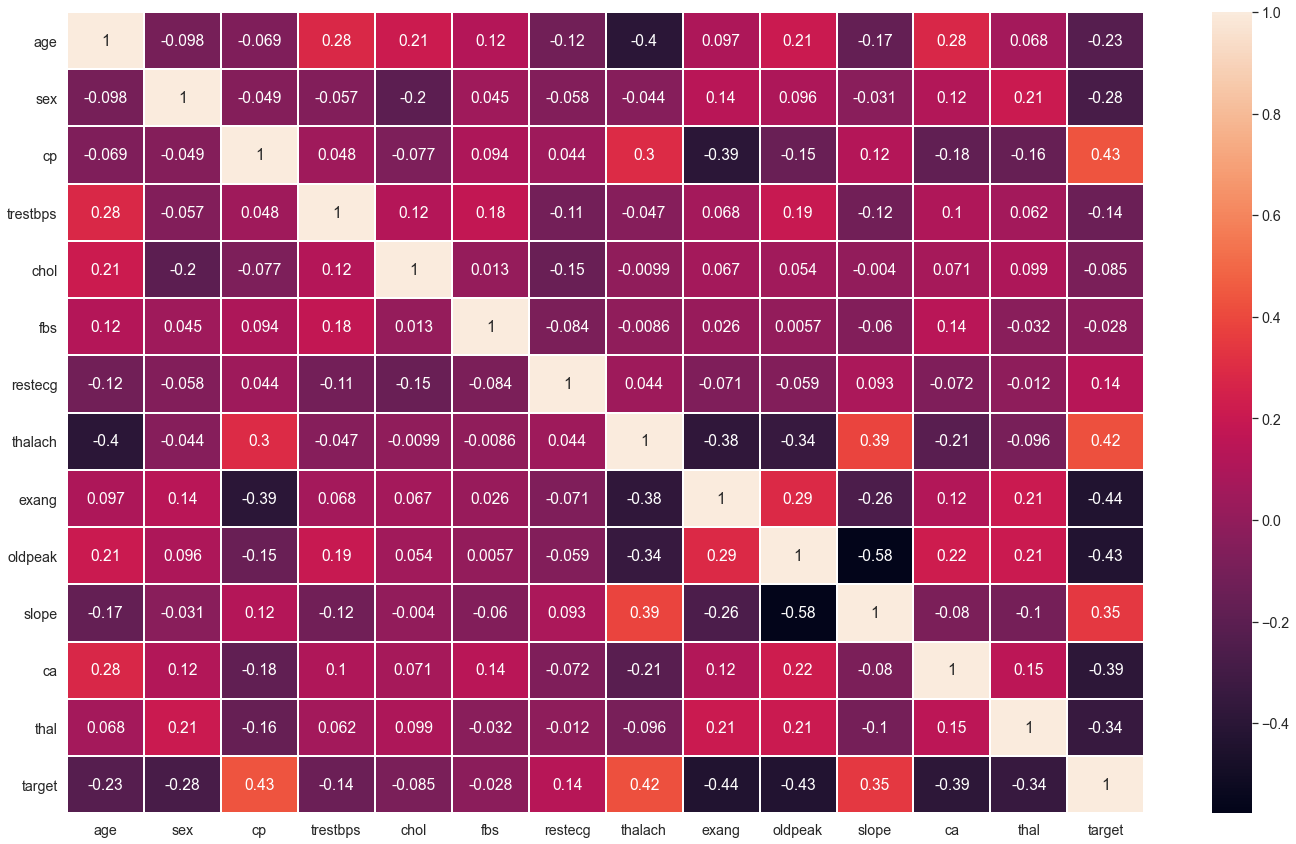

In [12]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale=1.3)
sns.heatmap(data.corr(),annot=True,linewidth=2)
plt.tight_layout()

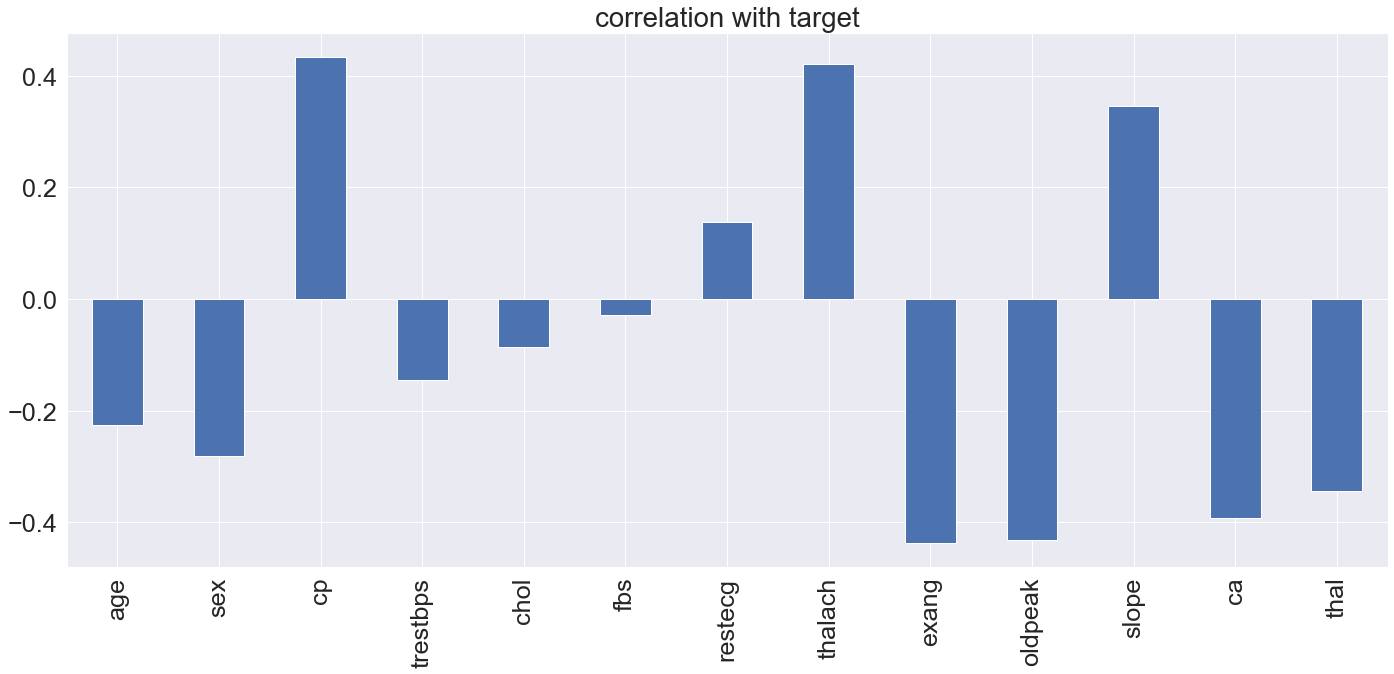

In [13]:
sns.set_context('notebook',font_scale=2.3)
data.drop('target',axis=1).corrwith(data.target).plot(kind='bar',grid=True,figsize=(20,10),title='correlation with target')
plt.tight_layout()

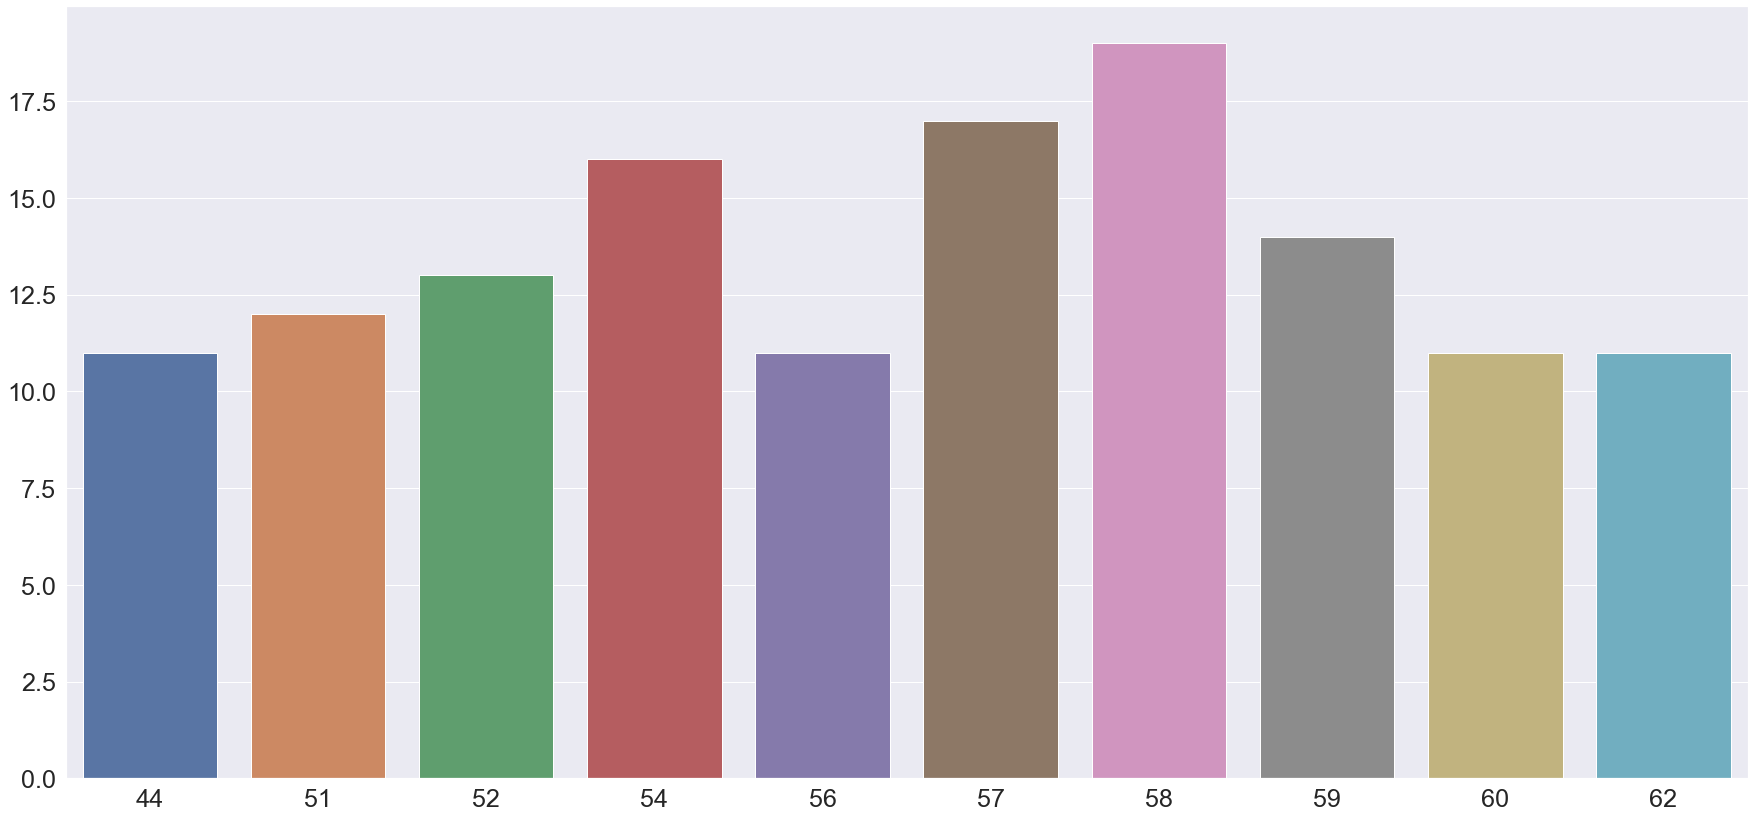

In [17]:
plt.figure(figsize=(25,12))
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

In [20]:
print("min age : ",min(data.age))
print("middle age : ",data.age.mean())
print("max age : ",max(data.age))

min age :  29
middle age :  54.366336633663366
max age :  77


In [22]:
young=data[(data.age>=29)&(data.age<40)]
Middle=data[(data.age>=40)&(data.age<55)]
Elder=data[(data.age>=55)]

<AxesSubplot:>

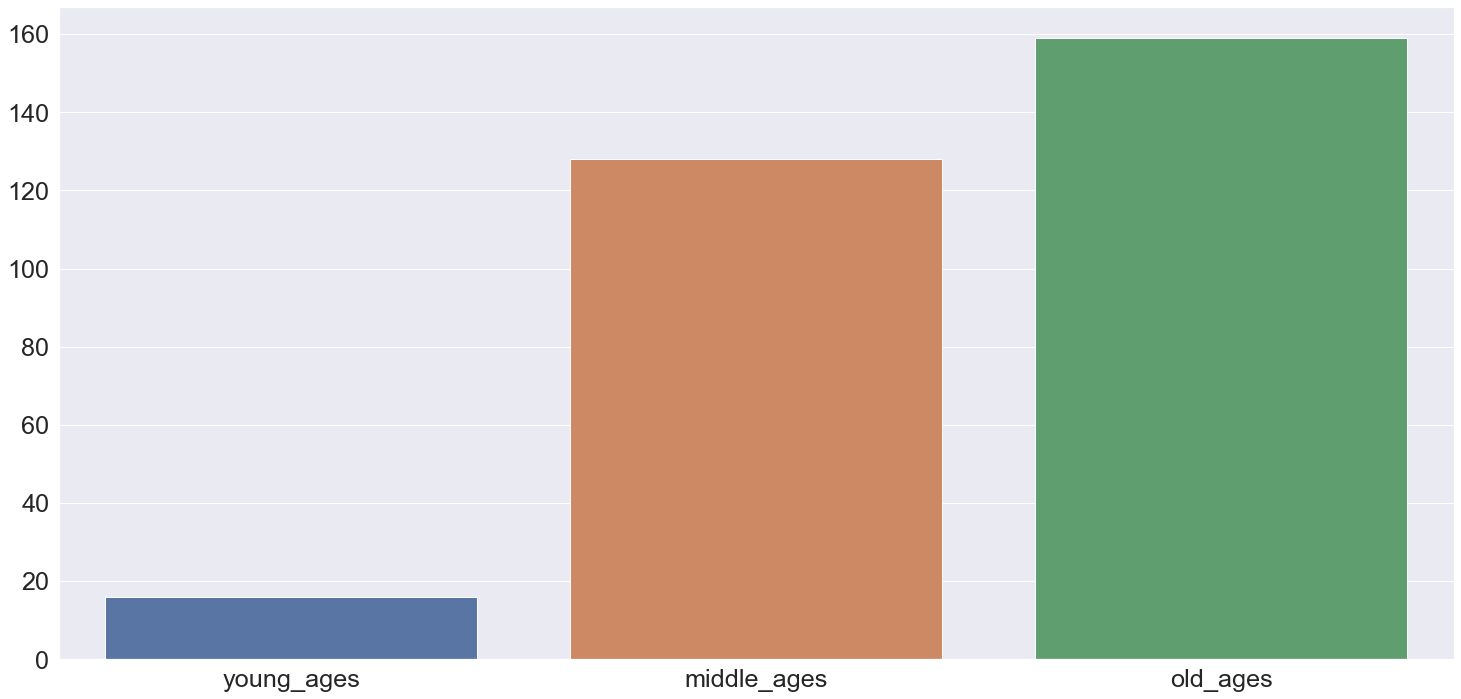

In [23]:
plt.figure(figsize=(25,12))
sns.barplot(x=["young_ages","middle_ages","old_ages"],y=[len(young),len(Middle),len(Elder)])

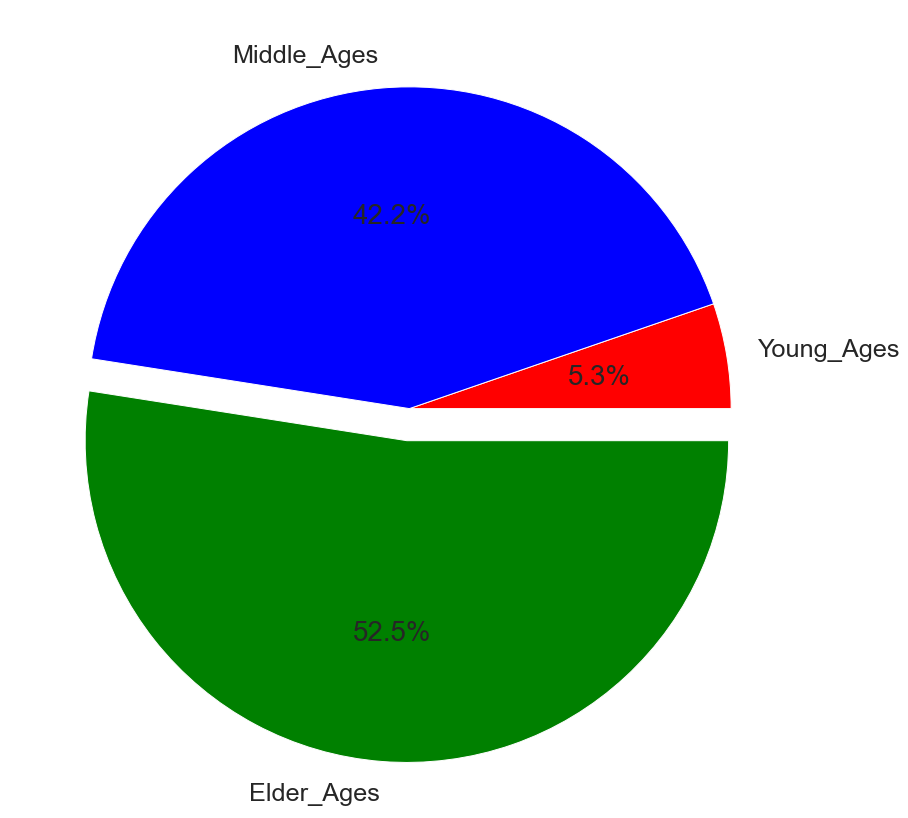

In [28]:
plt.figure(figsize=(20,12))
explode=[0,0,0.1]
color=["red","blue","green"]
plt.pie([len(young),len(Middle),len(Elder)],labels=["Young_Ages","Middle_Ages","Elder_Ages"],explode=explode,colors=color,autopct='%1.1f%%')
plt.tight_layout()

C:\Users\Shobhit Maurya\Anaconda3\envs\heart_disease\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


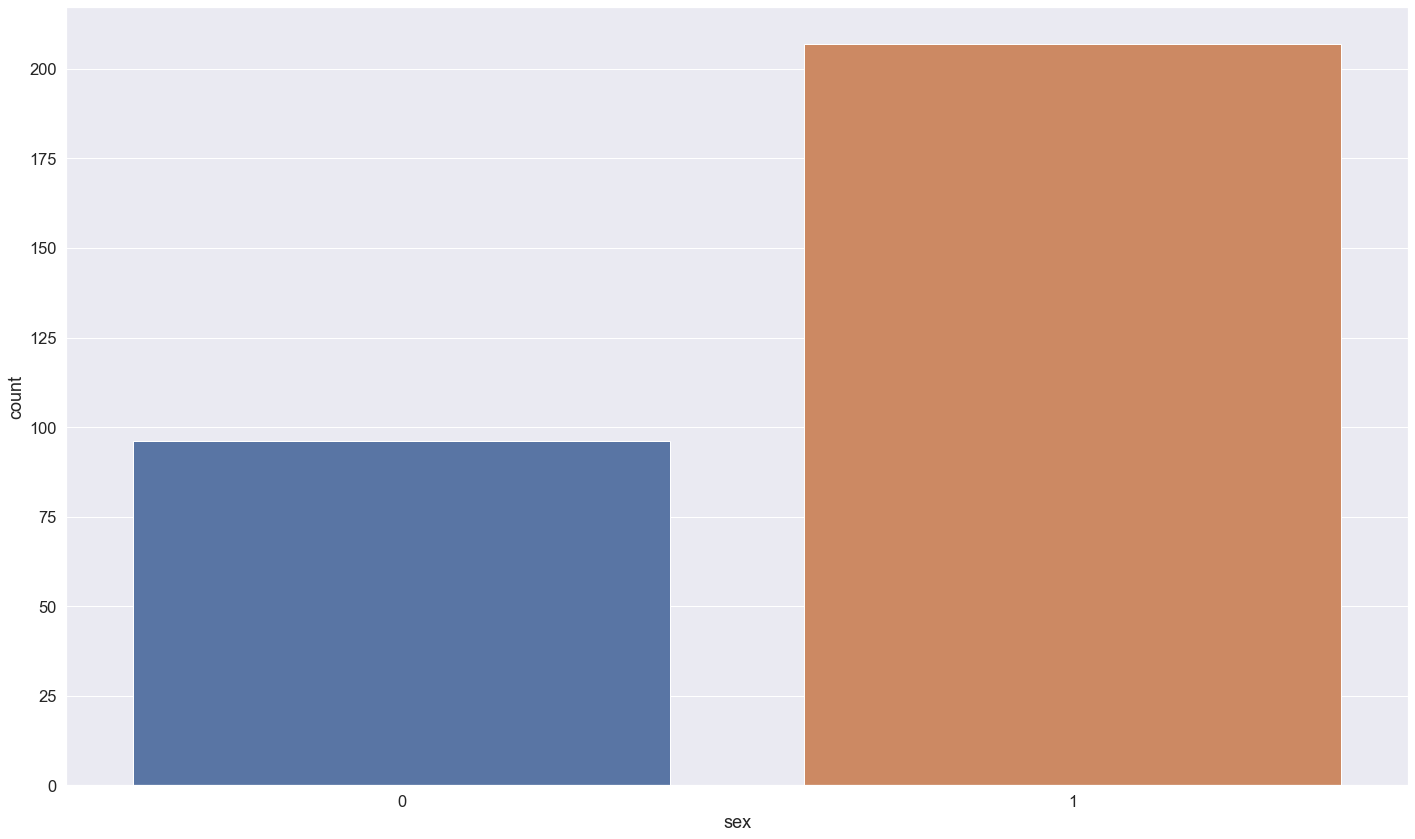

In [31]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['sex'])
plt.tight_layout()

C:\Users\Shobhit Maurya\Anaconda3\envs\heart_disease\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


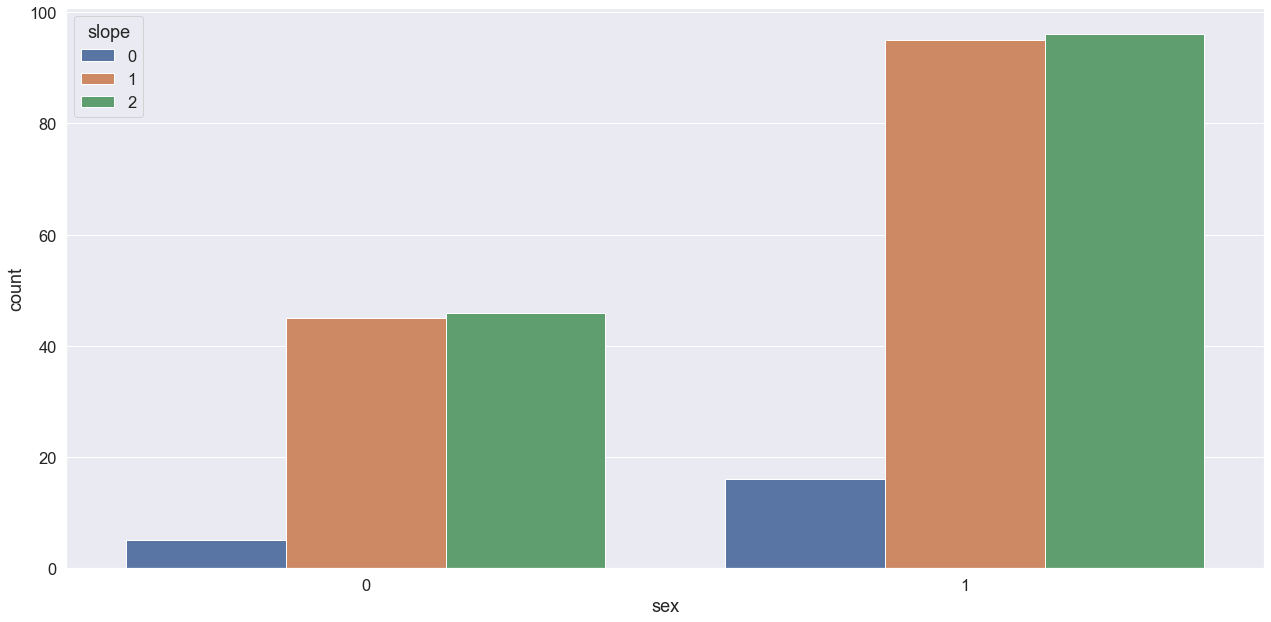

In [33]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['sex'],hue=data["slope"])
plt.tight_layout()

C:\Users\Shobhit Maurya\Anaconda3\envs\heart_disease\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


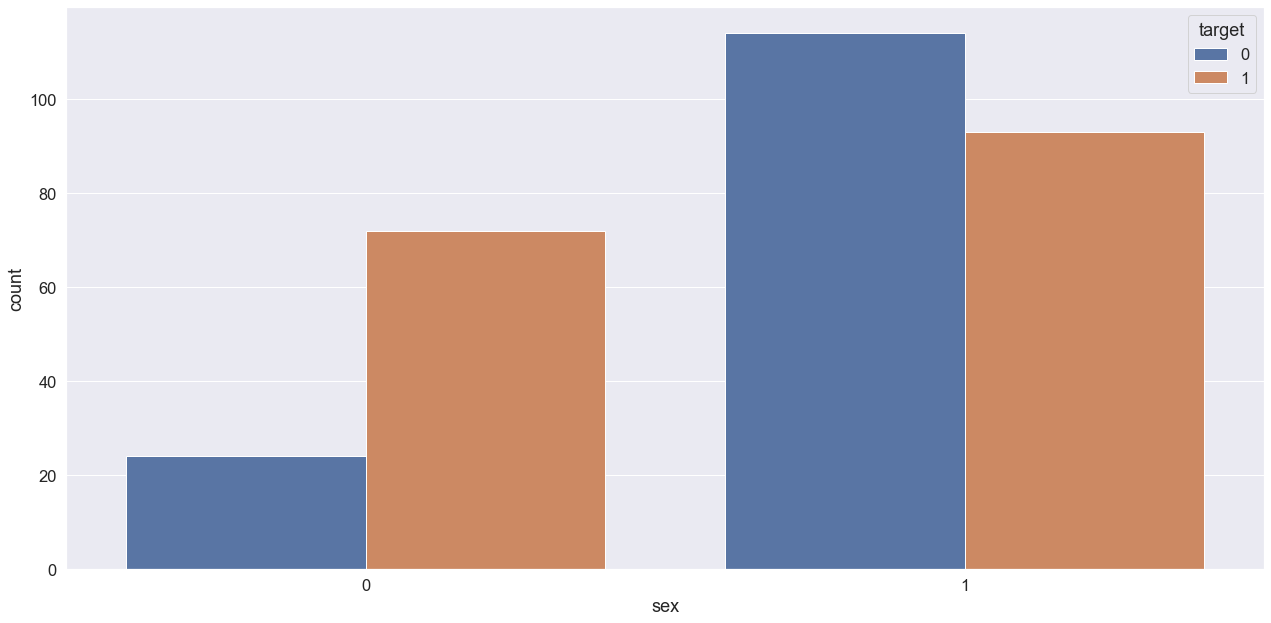

In [34]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['sex'],hue=data["target"])
plt.tight_layout()

C:\Users\Shobhit Maurya\Anaconda3\envs\heart_disease\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


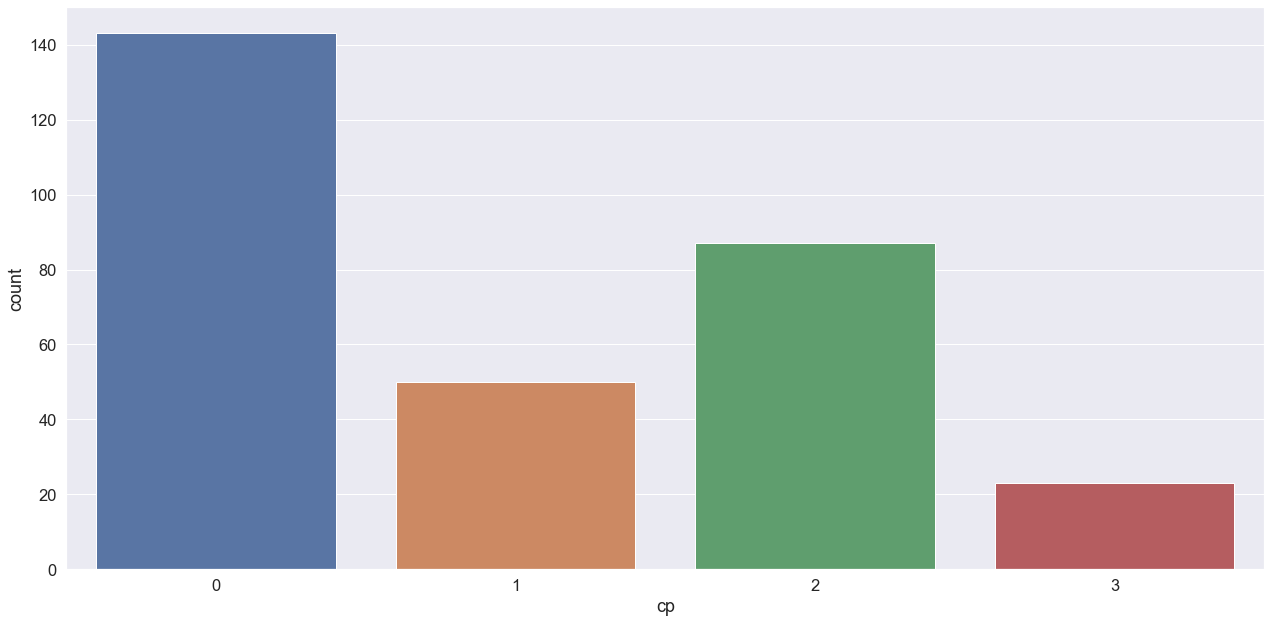

In [37]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data["cp"])
plt.tight_layout()

C:\Users\Shobhit Maurya\Anaconda3\envs\heart_disease\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


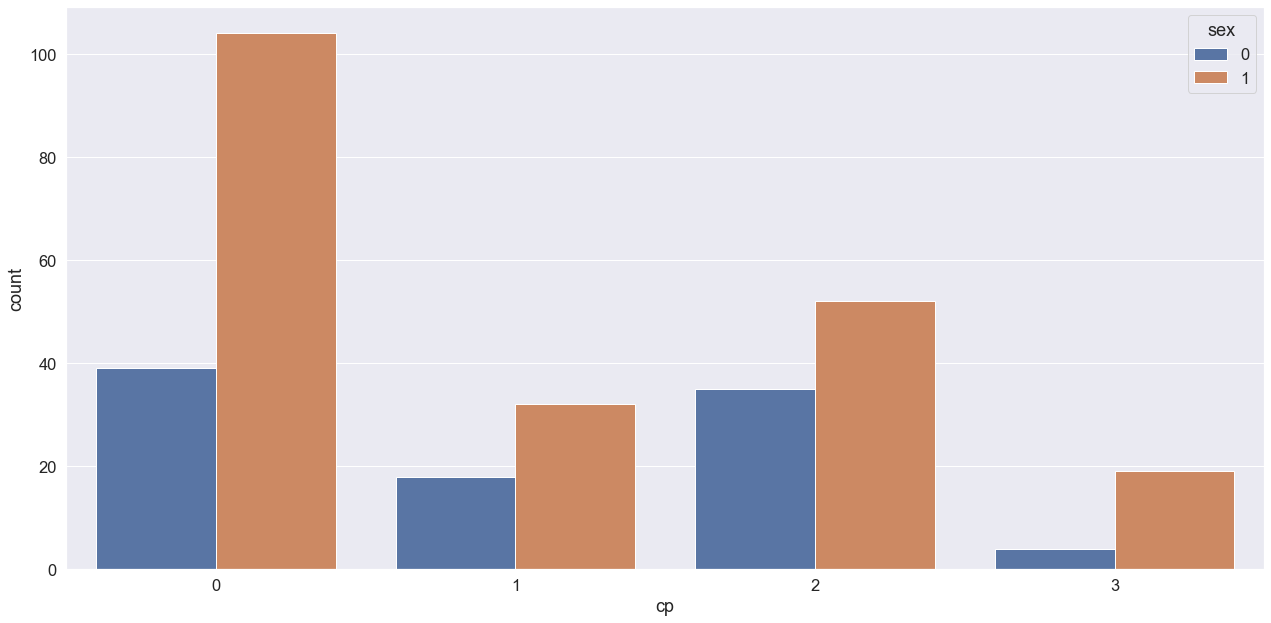

In [38]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['cp'],hue=data["sex"])
plt.tight_layout()

C:\Users\Shobhit Maurya\Anaconda3\envs\heart_disease\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


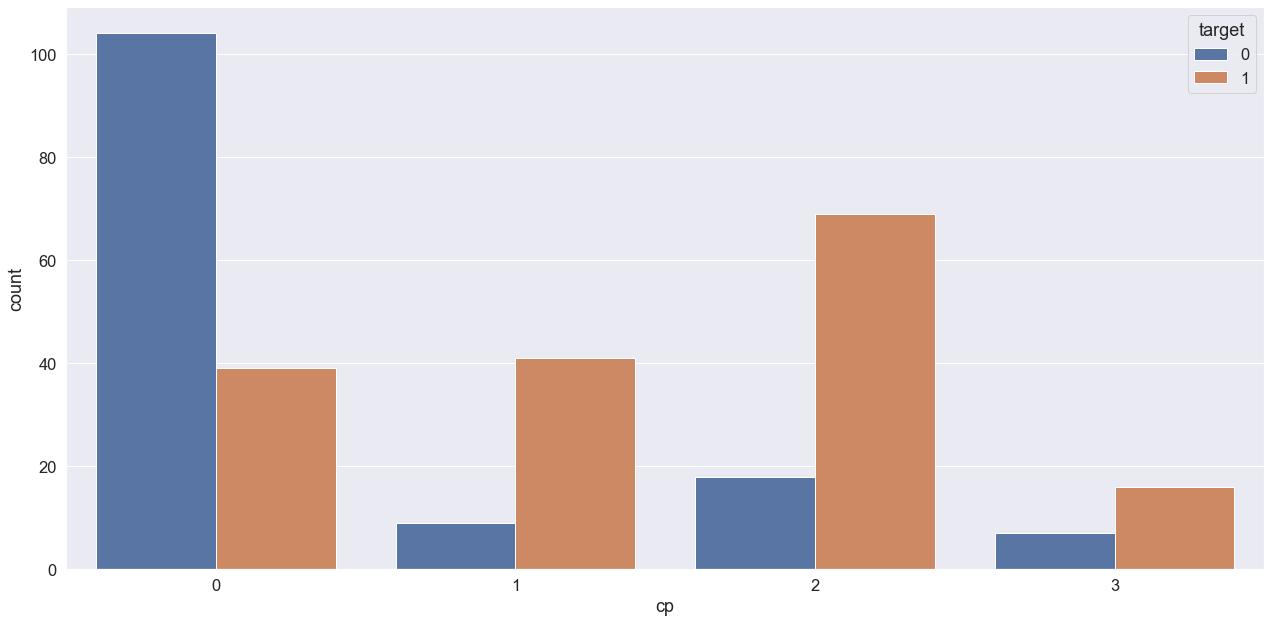

In [39]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['cp'],hue=data["target"])
plt.tight_layout()

C:\Users\Shobhit Maurya\Anaconda3\envs\heart_disease\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


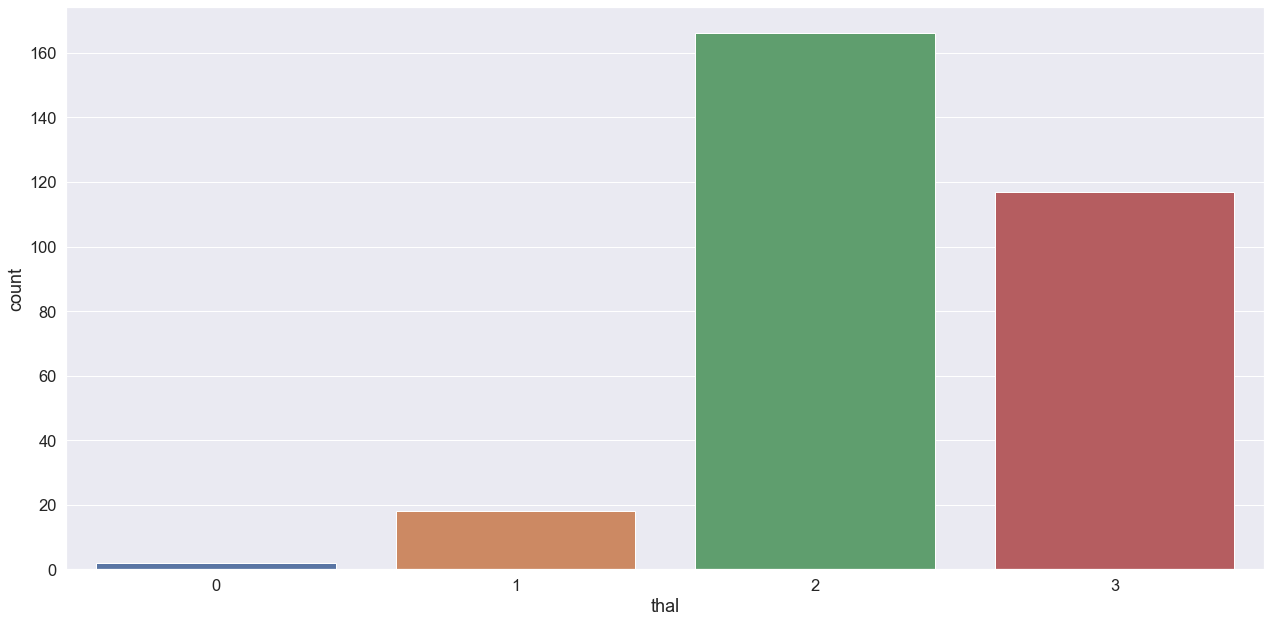

In [40]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data["thal"])
plt.tight_layout()

C:\Users\Shobhit Maurya\Anaconda3\envs\heart_disease\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


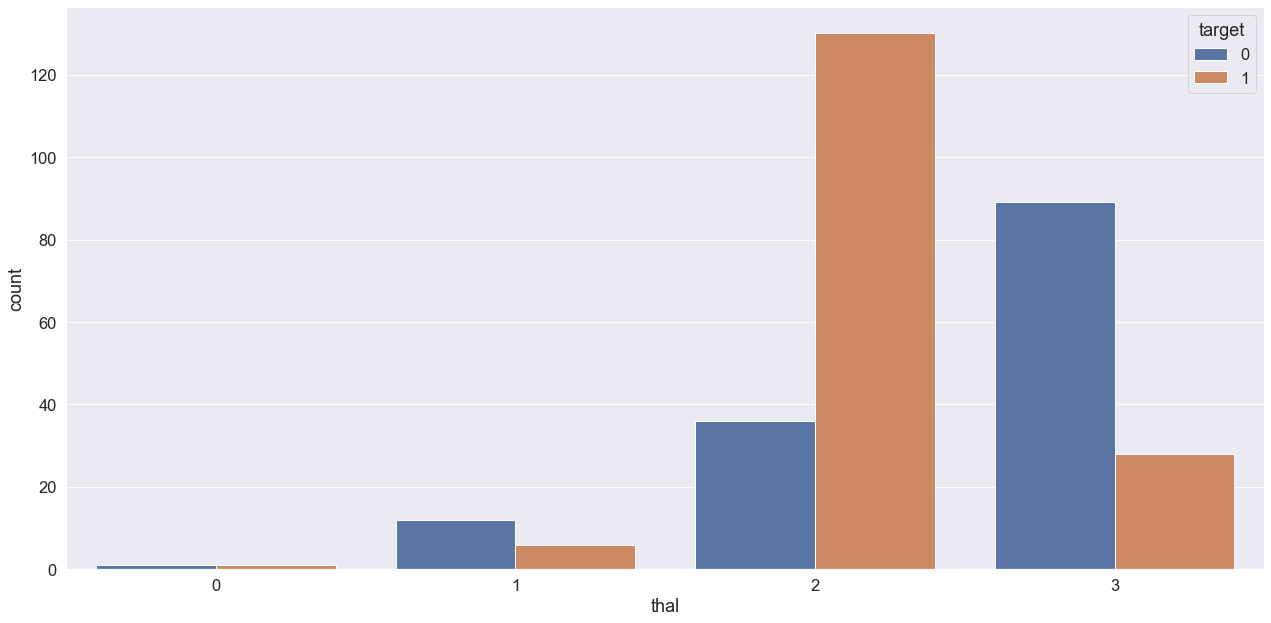

In [41]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['thal'],hue=data["target"])
plt.tight_layout()

C:\Users\Shobhit Maurya\Anaconda3\envs\heart_disease\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


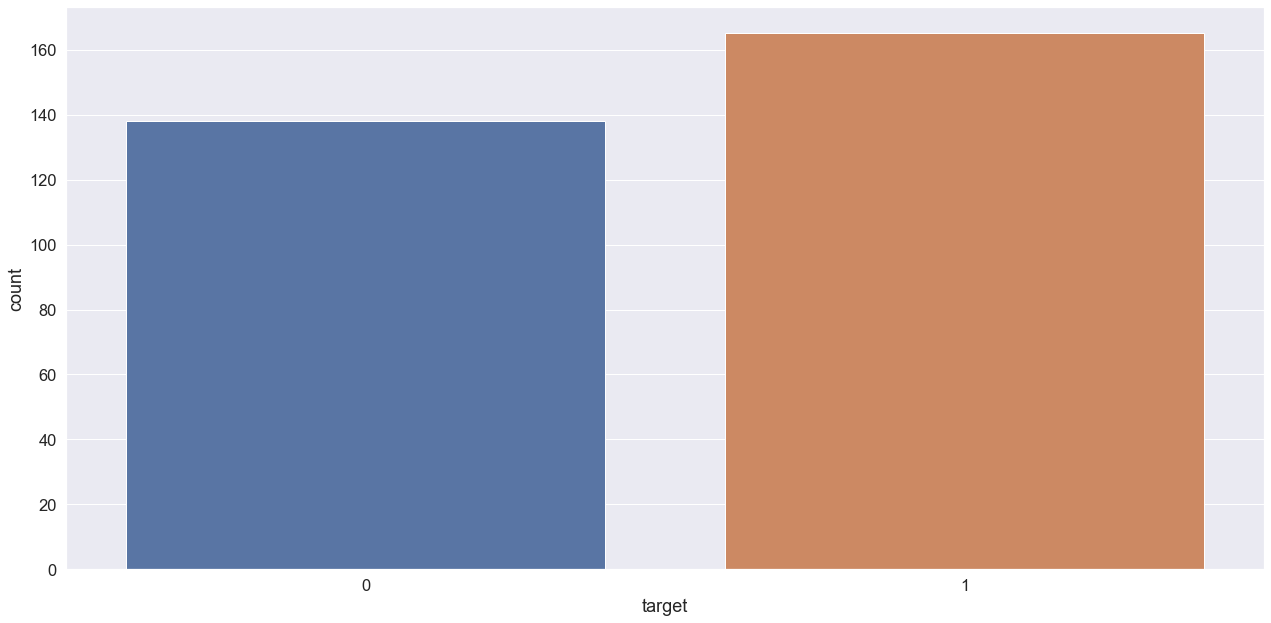

In [43]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['target'])
plt.tight_layout()

In [44]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
categ_val=[]
conti_val=[]
for column in data.columns:
    print("###################")
    print(f"{column}:{data[column].unique()}")
    if len(data[column].unique())<=10:
        categ_val.append(column)
    else:
        conti_val.append(column)

###################
age:[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
###################
sex:[1 0]
###################
cp:[3 2 1 0]
###################
trestbps:[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
###################
chol:[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 2

In [47]:
categ_val.remove('target')
df=pd.get_dummies(data,columns=categ_val)

In [48]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [51]:
sc=StandardScaler()
scale_col=["age","trestbps","chol","thalach","oldpeak"]
df[scale_col]=sc.fit_transform(df[scale_col])

In [53]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [54]:
x=df.drop('target',axis=1)
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((242, 30), (242,), (61, 30), (61,))

0.8852459016393442


<AxesSubplot:>

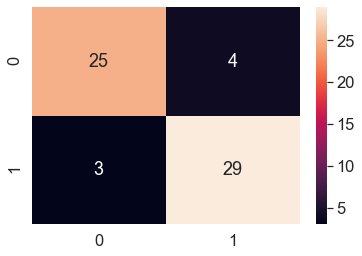

In [58]:
clf_kn=KNeighborsClassifier(n_neighbors=10)
clf_kn.fit(x_train,y_train)
pred_kn=clf_kn.predict(x_test)
print(accuracy_score(y_test,pred_kn))
sns.heatmap(confusion_matrix(y_test,pred_kn),annot=True,fmt="d")

In [59]:
test_score=[]
neighbors=range(1,25)

for k in neighbors:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    test_score.append(accuracy_score(y_test,model.predict(x_test)))

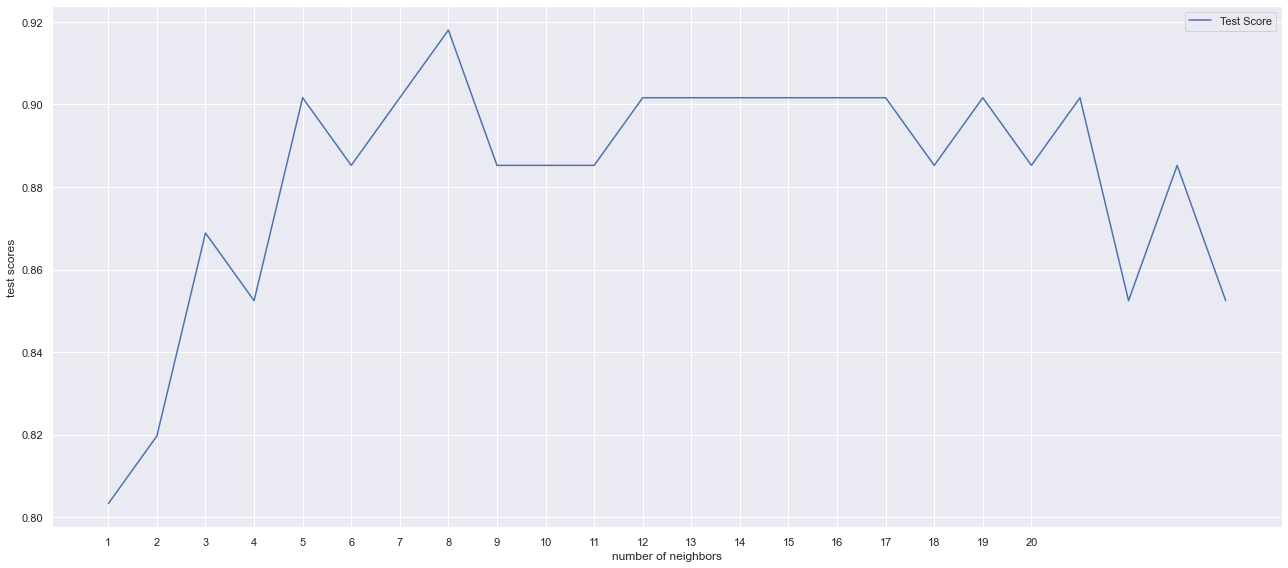

In [63]:
plt.figure(figsize=(18,8))
plt.plot(neighbors,test_score,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbors")
plt.ylabel("test scores")
plt.legend()
plt.tight_layout()

0.9180327868852459


<AxesSubplot:>

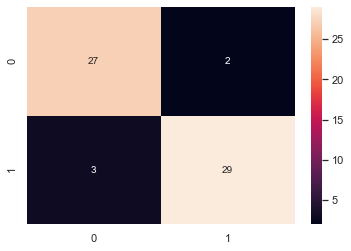

In [64]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
pred_kn1=knn.predict(x_test)
print(accuracy_score(y_test,pred_kn1))
sns.heatmap(confusion_matrix(y_test,pred_kn1),annot=True,fmt="d")

0.9016393442622951


<AxesSubplot:>

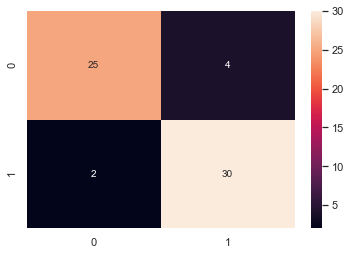

In [65]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rf=rfc.predict(x_test)
print(accuracy_score(y_test,pred_rf))
sns.heatmap(confusion_matrix(y_test,pred_rf),annot=True,fmt="d")

In [67]:
max_depth=[int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)

params={
    "n_estimators":[int(x) for x in np.linspace(start=200,stop=2000,num=10)],
    "max_features":["auto","sqrt"],
    "max_depth":max_depth,
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}

In [70]:
rf=RandomForestClassifier(random_state=42)
rf_z=RandomizedSearchCV(estimator=rf,param_distributions=params,n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [71]:
rf_z.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [72]:
rf_z.best_estimator_

RandomForestClassifier(max_depth=40, min_samples_leaf=4, n_estimators=600,
                       random_state=42)

0.8688524590163934


<AxesSubplot:>

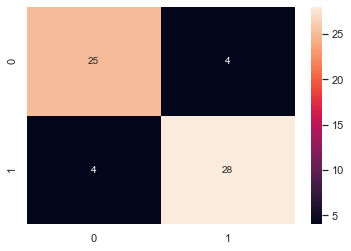

In [74]:
pred_rf1=rf_z.predict(x_test)
print(accuracy_score(y_test,pred_rf1))
sns.heatmap(confusion_matrix(y_test,pred_rf1),annot=True,fmt="d")

In [75]:
xgb=XGBClassifier(random_state=42)
xgb.fit(x_train,y_train)
pred_xg=xgb.predict(x_test)
print(accuracy_score(y_test,pred_xg))

C:\Users\Shobhit Maurya\Anaconda3\envs\heart_disease\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8360655737704918


In [76]:
cat=CatBoostClassifier(random_state=42)
cat.fit(x_train,y_train)
pred_cat=cat.predict(x_test)

Learning rate set to 0.005621
0:	learn: 0.6896119	total: 209ms	remaining: 3m 29s
1:	learn: 0.6859334	total: 212ms	remaining: 1m 45s
2:	learn: 0.6812443	total: 215ms	remaining: 1m 11s
3:	learn: 0.6771588	total: 218ms	remaining: 54.3s
4:	learn: 0.6735539	total: 220ms	remaining: 43.7s
5:	learn: 0.6706217	total: 222ms	remaining: 36.8s
6:	learn: 0.6660787	total: 225ms	remaining: 31.9s
7:	learn: 0.6617795	total: 228ms	remaining: 28.2s
8:	learn: 0.6594735	total: 231ms	remaining: 25.5s
9:	learn: 0.6552423	total: 234ms	remaining: 23.2s
10:	learn: 0.6513835	total: 237ms	remaining: 21.3s
11:	learn: 0.6471671	total: 240ms	remaining: 19.7s
12:	learn: 0.6428239	total: 242ms	remaining: 18.4s
13:	learn: 0.6385616	total: 245ms	remaining: 17.3s
14:	learn: 0.6344565	total: 248ms	remaining: 16.3s
15:	learn: 0.6302152	total: 250ms	remaining: 15.4s
16:	learn: 0.6261024	total: 253ms	remaining: 14.6s
17:	learn: 0.6217770	total: 256ms	remaining: 14s
18:	learn: 0.6181050	total: 259ms	remaining: 13.4s
19:	learn:

162:	learn: 0.3540467	total: 876ms	remaining: 4.5s
163:	learn: 0.3529588	total: 882ms	remaining: 4.5s
164:	learn: 0.3521543	total: 888ms	remaining: 4.49s
165:	learn: 0.3513039	total: 896ms	remaining: 4.5s
166:	learn: 0.3504518	total: 911ms	remaining: 4.54s
167:	learn: 0.3500313	total: 914ms	remaining: 4.53s
168:	learn: 0.3492267	total: 920ms	remaining: 4.53s
169:	learn: 0.3484450	total: 929ms	remaining: 4.53s
170:	learn: 0.3477308	total: 936ms	remaining: 4.54s
171:	learn: 0.3470475	total: 949ms	remaining: 4.57s
172:	learn: 0.3465048	total: 954ms	remaining: 4.56s
173:	learn: 0.3457869	total: 965ms	remaining: 4.58s
174:	learn: 0.3448460	total: 970ms	remaining: 4.57s
175:	learn: 0.3440583	total: 977ms	remaining: 4.57s
176:	learn: 0.3432171	total: 986ms	remaining: 4.59s
177:	learn: 0.3418681	total: 993ms	remaining: 4.58s
178:	learn: 0.3413199	total: 1.01s	remaining: 4.63s
179:	learn: 0.3406205	total: 1.01s	remaining: 4.63s
180:	learn: 0.3402214	total: 1.02s	remaining: 4.61s
181:	learn: 0.3

322:	learn: 0.2532349	total: 1.86s	remaining: 3.9s
323:	learn: 0.2526073	total: 1.86s	remaining: 3.89s
324:	learn: 0.2520936	total: 1.87s	remaining: 3.88s
325:	learn: 0.2516705	total: 1.87s	remaining: 3.87s
326:	learn: 0.2510156	total: 1.87s	remaining: 3.85s
327:	learn: 0.2504665	total: 1.88s	remaining: 3.85s
328:	learn: 0.2501705	total: 1.88s	remaining: 3.83s
329:	learn: 0.2498209	total: 1.88s	remaining: 3.82s
330:	learn: 0.2491429	total: 1.89s	remaining: 3.81s
331:	learn: 0.2485461	total: 1.89s	remaining: 3.8s
332:	learn: 0.2481833	total: 1.9s	remaining: 3.8s
333:	learn: 0.2477437	total: 1.9s	remaining: 3.79s
334:	learn: 0.2471626	total: 1.9s	remaining: 3.77s
335:	learn: 0.2466248	total: 1.9s	remaining: 3.76s
336:	learn: 0.2463074	total: 1.91s	remaining: 3.75s
337:	learn: 0.2459686	total: 1.91s	remaining: 3.74s
338:	learn: 0.2455141	total: 1.91s	remaining: 3.73s
339:	learn: 0.2449970	total: 1.92s	remaining: 3.72s
340:	learn: 0.2443939	total: 1.92s	remaining: 3.71s
341:	learn: 0.24403

503:	learn: 0.1901927	total: 2.53s	remaining: 2.49s
504:	learn: 0.1899576	total: 2.53s	remaining: 2.48s
505:	learn: 0.1897177	total: 2.54s	remaining: 2.48s
506:	learn: 0.1894582	total: 2.54s	remaining: 2.47s
507:	learn: 0.1893305	total: 2.54s	remaining: 2.46s
508:	learn: 0.1889134	total: 2.55s	remaining: 2.46s
509:	learn: 0.1885412	total: 2.56s	remaining: 2.45s
510:	learn: 0.1881303	total: 2.56s	remaining: 2.45s
511:	learn: 0.1880047	total: 2.56s	remaining: 2.44s
512:	learn: 0.1877327	total: 2.57s	remaining: 2.44s
513:	learn: 0.1873941	total: 2.57s	remaining: 2.43s
514:	learn: 0.1871514	total: 2.58s	remaining: 2.42s
515:	learn: 0.1868461	total: 2.58s	remaining: 2.42s
516:	learn: 0.1866364	total: 2.58s	remaining: 2.41s
517:	learn: 0.1863554	total: 2.58s	remaining: 2.4s
518:	learn: 0.1861223	total: 2.59s	remaining: 2.4s
519:	learn: 0.1859433	total: 2.59s	remaining: 2.39s
520:	learn: 0.1856027	total: 2.6s	remaining: 2.38s
521:	learn: 0.1853776	total: 2.6s	remaining: 2.38s
522:	learn: 0.18

697:	learn: 0.1462812	total: 3.38s	remaining: 1.46s
698:	learn: 0.1460134	total: 3.38s	remaining: 1.46s
699:	learn: 0.1459018	total: 3.38s	remaining: 1.45s
700:	learn: 0.1457044	total: 3.38s	remaining: 1.44s
701:	learn: 0.1455373	total: 3.39s	remaining: 1.44s
702:	learn: 0.1454580	total: 3.39s	remaining: 1.43s
703:	learn: 0.1453686	total: 3.4s	remaining: 1.43s
704:	learn: 0.1452438	total: 3.4s	remaining: 1.42s
705:	learn: 0.1449988	total: 3.4s	remaining: 1.42s
706:	learn: 0.1447490	total: 3.4s	remaining: 1.41s
707:	learn: 0.1445789	total: 3.41s	remaining: 1.41s
708:	learn: 0.1444000	total: 3.41s	remaining: 1.4s
709:	learn: 0.1442280	total: 3.41s	remaining: 1.39s
710:	learn: 0.1438787	total: 3.42s	remaining: 1.39s
711:	learn: 0.1437571	total: 3.42s	remaining: 1.38s
712:	learn: 0.1434001	total: 3.42s	remaining: 1.38s
713:	learn: 0.1433154	total: 3.42s	remaining: 1.37s
714:	learn: 0.1432116	total: 3.43s	remaining: 1.37s
715:	learn: 0.1430205	total: 3.43s	remaining: 1.36s
716:	learn: 0.142

898:	learn: 0.1151633	total: 4.06s	remaining: 456ms
899:	learn: 0.1149990	total: 4.06s	remaining: 451ms
900:	learn: 0.1148768	total: 4.07s	remaining: 447ms
901:	learn: 0.1146976	total: 4.07s	remaining: 442ms
902:	learn: 0.1144930	total: 4.07s	remaining: 437ms
903:	learn: 0.1143484	total: 4.08s	remaining: 433ms
904:	learn: 0.1142705	total: 4.08s	remaining: 428ms
905:	learn: 0.1141016	total: 4.08s	remaining: 424ms
906:	learn: 0.1140031	total: 4.09s	remaining: 419ms
907:	learn: 0.1139250	total: 4.09s	remaining: 414ms
908:	learn: 0.1137671	total: 4.09s	remaining: 410ms
909:	learn: 0.1136353	total: 4.1s	remaining: 405ms
910:	learn: 0.1134092	total: 4.1s	remaining: 401ms
911:	learn: 0.1132966	total: 4.1s	remaining: 396ms
912:	learn: 0.1131873	total: 4.11s	remaining: 391ms
913:	learn: 0.1129924	total: 4.11s	remaining: 387ms
914:	learn: 0.1129035	total: 4.11s	remaining: 382ms
915:	learn: 0.1128495	total: 4.12s	remaining: 377ms
916:	learn: 0.1126579	total: 4.12s	remaining: 373ms
917:	learn: 0.1

In [77]:
print(accuracy_score(y_test,pred_cat))

0.8688524590163934


among all the classifier knn works very well

In [78]:
import pickle
pk1="knn.pkl"
with open(pk1,"wb") as file:
    pickle.dump(knn,file)

In [79]:
load_model=pickle.load(open(pk1,"rb"))
result=load_model.score(x_test,y_test)
print(result)

0.9180327868852459
